# <span style="color:darkblue"> QTM 151 - Final Project </span>

<font size="5"> 

Group Number

In [1]:
print("Eric Zou", "Harris Wang", "Zhenan An", "William Xu")

Eric Zou Harris Wang Zhenan An William Xu


<font size="5"> 

Set Up

In [42]:
import matplotlib.pyplot as plt
import pandas as pd
from   matplotlib import style
from   matplotlib import ticker
import matplotlib.dates as mdates
import numpy as np

circuits = pd.read_csv("data_raw/circuits.csv")
constructor_result = pd.read_csv("data_raw/constructor_results.csv")
constructor_standing = pd.read_csv("data_raw/constructor_standings.csv")
constructor = pd.read_csv("data_raw/constructors.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
driver_standing = pd.read_csv("data_raw/driver_standings.csv")
results = pd.read_csv("data_raw/results.csv")
qualifying = pd.read_csv("data_raw/qualifying.csv")
lap_time = pd.read_csv("data_raw/lap_times.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")
seasons = pd.read_csv("data_raw/seasons.csv")
races = pd.read_csv("data_raw/races.csv")
status = pd.read_csv("data_raw/status.csv")
sprint_result = pd.read_csv("data_raw/sprint_results.csv")


<font size="5"> 

Question 1: which countries produce the best driver

[nan]
                mean_rank
constructorRef           
mercedes         5.286267
brawn            5.424242
ferrari          5.688615
red_bull         6.709251
bar              7.985075
...                   ...
vhristensen           NaN
watson                NaN
wetteroth             NaN
wolf                  NaN
zakspeed              NaN

[211 rows x 1 columns]


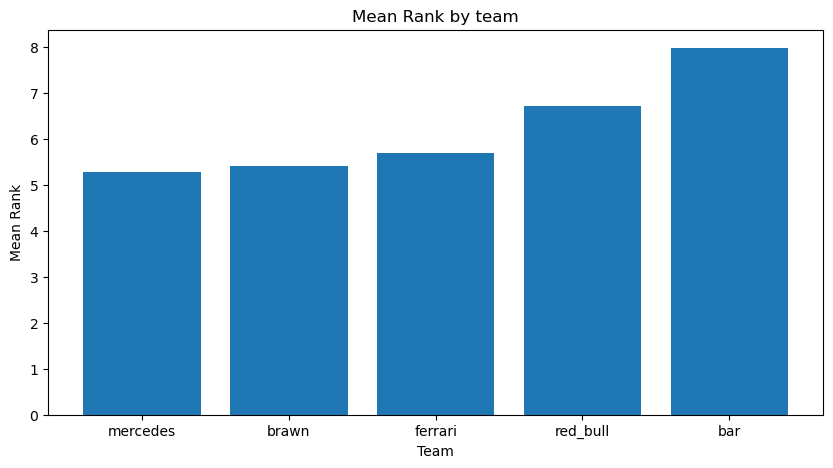

In [68]:
constructor_merge = pd.merge(constructor,
                        results[["constructorId", "rank"]],
                        on="constructorId",
                        how="left")

constructor_merge["rank"] = pd.to_numeric(constructor_merge["rank"], errors = "coerce")
subset = constructor_merge[constructor_merge["rank"].isna()]
list_unique = subset["rank"].unique()
print(list_unique)

list_old = ["\\N"]
list_new = [np.nan]
constructor_merge["rank"] = constructor_merge["rank"].replace(list_old, list_new)

constructor.dtypes

print(constructor_merge.groupby("constructorRef")
                        .agg(mean_rank = ("rank", "mean"))
                        .sort_values("mean_rank", ascending = True))


team_mean_rank = constructor_merge.groupby("constructorRef")["rank"].mean().sort_values(ascending=True)
top_5_team = team_mean_rank.nsmallest(5)

plt.figure(figsize=(10, 5))
plt.bar(top_5_team.index, top_5_team.values)

plt.title("Mean Rank by team")
plt.xlabel("Team")
plt.ylabel("Mean Rank")

plt.show()

                        



<font size="5"> 

Question 2: we choose to analyize the three of these five team: mercedes, ferrari, and red bull.

In [132]:


list_team = ["mercedes", "red_bull"]

constructor_team = constructor_merge.query("constructorRef in @list_team")

team_merge = pd.merge(constructor_team,
                      results[["constructorId", "position", "rank", "driverId"]],
                      on="constructorId",
                      how="left")

list_old = ["\\N"]
list_new = [pd.NA]
team_merge["position"] = team_merge["position"].replace(list_old, list_new)
team_merge["rank_y"] = team_merge["rank_y"].replace(list_old, list_new)

team_merge.dropna(subset=["position", "rank_y"], inplace=True)

team_merge["position"] = pd.to_numeric(team_merge["position"])
team_merge["rank_y"] = pd.to_numeric(team_merge["rank_y"])


team_merge.dtypes

team1 = "mercedes"
team2 = "red_bull"

team1_data = team_merge[team_merge["constructorRef"] == team1].sort_values(by="rank_y")
team2_data = team_merge[team_merge["constructorRef"] == team2].sort_values(by="rank_y")


team1_diff = team1_data["rank_y"] - team1_data["position"]
team2_diff = team2_data["rank_y"] - team2_data["position"]

print(team1_diff.mean())
print(team2_diff.mean())


0.3283582089552239
0.375
